# geopandas
Geopandas is a Python library that extends `pandas` by adding support for geospatial data.

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

To import the data, we first use `os` package to create a reproducible file path:

In [2]:
%pwd

'/Users/vedikashirtekar/Documents/MEDS/eds-220/eds-220-2025-in-class'

In [3]:
os.path.exists("data/data2/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp")

False

In [4]:
fp = os.path.join("data/data 2", "gbif_sus_scrofa_california", "gbif_sus_scrofa_california.shp")
fp

'data/data 2/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [5]:
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [6]:
fp = os.path.join("data/data 2", "ca_state_boundary", "ca_state_boundary.shp")
ca_boundary = gpd.read_file(fp)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## `Geoseries` and the `GeoDataFrame`
`geopandas.GeoDataFrame` is the core structure in geopandas = `pandas.DataFrame` plus a dedicated geometry colimn that can perform spatial operations. 
**geometry column** holds the geometry (points, polygons, etc.) of each spatial feature. This type is a geopandas.GeoSeries.

In [7]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [8]:
# Check the data type of the pigs data frame 
print((type(pigs)))

# Check the data type of the geometry column
print(type(pigs.geometry))

# Check data type of gibfID column
print(type(pigs.gbifID))

# Check data type of each column 
pigs.dtypes

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [9]:
# Check the type of each element in column 
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

### What is the geometry type of the single feature on the CA State boundary?

In [10]:
ca_boundary.geom_type


0    MultiPolygon
dtype: object

#### ALWAYS CHECK CRS 
CRS = Structure to location each spatial feature of data frame on surface of Earth

In [11]:
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
#### Examine CRS details
print("Ellipsoid", pigs.crs.ellipsoid)
print("Datum:", pigs.crs.datum)
print("Is Geographic:", pigs.crs.is_geographic)
#print("Is Projected:". pigs.crs.is_projected) 

Ellipsoid WGS 84
Datum: World Geodetic System 1984 ensemble
Is Geographic: True


In [13]:
### Obtain geographic exten of the geodataframe 
pigs.total_bounds
# (min x, min y, max x, max y)

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [14]:
# CRS and Extent of ca_boundary
print("CRS:",ca_boundary.crs, "\n")
print(ca_boundary.total_bounds)

CRS: EPSG:4326 

[-124.48201686   32.52883674 -114.13122248   42.00950827]


In [15]:
pigs.crs == ca_boundary.crs # They do match

True

### Plotting with GeoPandas
You can use all the `pandas` wrangling to wrangle `geopandas.geoDataFrames`.

In [16]:
pigs["year"].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [17]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs["year"] >= 2020]

# Check the length of regional data frame
print("Total number of observations:", len(pigs))
print("Print # of observations in 2020", len(pigs_recent))

Total number of observations: 1046
Print # of observations in 2020 606


#### Now, create a preliminary map 
Geopandas has a plot method that quickly creates a map for the data using geospatial information.

<Axes: >

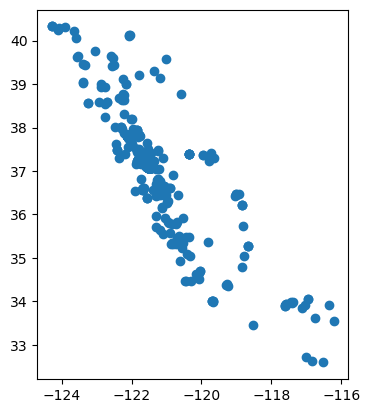

In [18]:
pigs_recent.plot()

## `matplotlib` 
We can interact with `matplotlib` via `pyplot` interface. 
Matplotlib graphs the data in a figure that can have one or more axes. The axes is only the area specifiied by the x-axis and the y-axis. A figure can have multiple axes in it.

To create a blank figure:

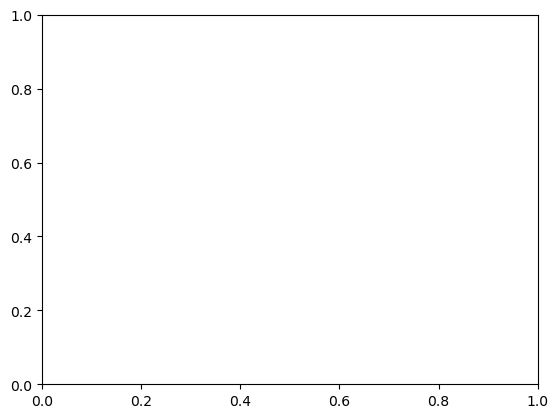

In [19]:
# Initialize empty figure and axis 
fig, ax = plt.subplots() # Returns: Figure and Axis

# Display figure
plt.show()

### Adding a layer
When using matplotlib, it can be useful to think of creating a plot as adding layers on an axis. 


Example: The first layer we could add is the `pigs_recent` data.

NameError: name 'p' is not defined

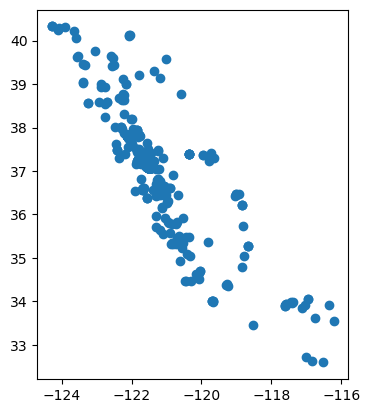

In [ ]:
fig, ax = plt.subplots()

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)
# Show plot

## Customization
Some customization can be dore directly in `plot()` method for the data frame. Some other customizations are done by updating attributes of the axis `ax`.

Text(139.46352036527887, 0.5, 'Latitude')

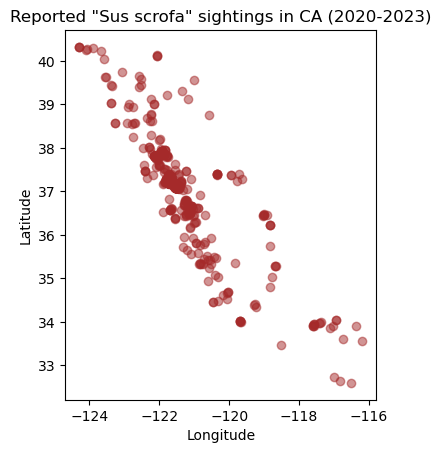

In [23]:
fig, ax = plt.subplots()

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax, 
                 alpha = 0.5, # Adjust transparency
                 color = "brown") # Set a color
# Update axis 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show plot

### Check in
1. Add the California state boundary to the plot so the boundary appears behind the points as below. Don’t forget to customize your graph!

2. Write a short caption for your map describing the spatial distribution of observations. What patterns or clusters do you notice?

3. Discuss with a partner: what are some possible biases or limitations in GBIF species occurrence data (e.g., spatial coverage, sampling effort, data quality)?

Text(132.699971804565, 0.5, 'Latitude')

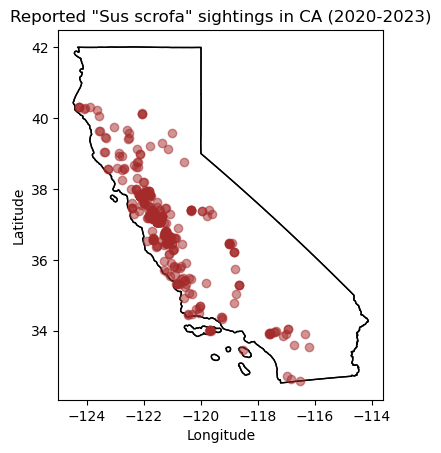

In [31]:
# Add the state boundary
fig, ax = plt.subplots()

# Add pigs point plot to our figure's axis
ca_boundary.plot(ax=ax, 
                 facecolor = "white", # Background color
                 edgecolor= "black") # boundary

## OR 
ca_boundary.plot(ax=ax, 
                 color = "none") # boundary

pigs_recent.plot(ax=ax, 
                
                 alpha = 0.5, # Adjust transparency
                 color = "brown") # Set a color

# Update axis 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

The general distribution of observations are clustered along central-coastal California. However, some biases such as data collection based on community and citizen science exist. 